<a href="https://colab.research.google.com/github/JeromeMberia/Mchezopesa_Ltd/blob/main/IP_Week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 6 IP

## \ **Defining the Question**\

### Specifying the Question

> predicting a team score based on  their rank.


### Defining the Metric for Success

> Getting the prediction a team score based on their rank.

### Understanding the context 

> Here

### Recording the Experimental Design

> Here

### Data Relevance

> The dataset's give relevenat to this prediction 

## \ **Importing the Libraries**\

In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from datetime import date

## \ **Reading the Data**\

### First Dataset

In [258]:
fifa = pd.read_csv('/content/fifa_ranking.csv')

### Second Dataset

In [259]:
results = pd.read_csv('/content/results.csv')

## \ **Checking the Data**\

### First Dataset

In [260]:
# Determining the no. of records in our dataset
#
records = fifa.shape[0]
print(f'{records} records')

57793 records


In [261]:
# Number of columns and rows

rows = fifa.shape[0]
columns = fifa.shape[1]

print(f'{rows} rows and {columns} columns')

57793 rows and 16 columns


In [262]:
fifa.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [263]:
# Previewing the top of our dataset
#
fifa.head(10)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
5,6,Republic of Ireland,IRL,0.0,54,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
6,7,Russia,RUS,0.0,52,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
7,8,Brazil,BRA,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
8,9,Norway,NOR,0.0,49,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
9,10,Denmark,DEN,0.0,51,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [264]:
# Previewing the bottom of our dataset
# 
fifa.tail(10)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57783,202,Cayman Islands,CAY,8.50,9,2,0.0,0.0,0.0,0.0,0.0,0.0,42.50,8.50,CONCACAF,2018-06-07
57784,203,San Marino,SMR,7.92,8,2,0.0,0.0,0.0,0.0,0.0,0.0,39.60,7.92,UEFA,2018-06-07
57785,204,British Virgin Islands,VGB,4.25,4,2,0.0,0.0,0.0,0.0,0.0,0.0,21.25,4.25,CONCACAF,2018-06-07
57786,204,Montserrat,MSR,4.25,17,-4,0.0,0.0,0.0,0.0,0.0,0.0,21.25,4.25,CONCACAF,2018-06-07
57787,206,Turks and Caicos Islands,TCA,0.00,13,-4,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,CONCACAF,2018-06-07
57788,206,Anguilla,AIA,0.00,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.00,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.00,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,CAF,2018-06-07
57791,206,Somalia,SOM,0.00,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,CAF,2018-06-07
57792,206,Tonga,TGA,0.00,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,OFC,2018-06-07


In [265]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [266]:
# Checking whether each column has an appropriate datatype
#
fifa.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [267]:
fifa.nunique()

rank                         209
country_full                 216
country_abrv                 216
total_points               11114
previous_points             1557
rank_change                  121
cur_year_avg                7419
cur_year_avg_weighted       7419
last_year_avg               7473
last_year_avg_weighted      7001
two_year_ago_avg            7575
two_year_ago_weighted       6513
three_year_ago_avg          7628
three_year_ago_weighted     5849
confederation                  6
rank_date                    286
dtype: int64

In [373]:
col = list(fifa.columns)
for i in col:
  print(f'{i}')
  print('')
  a = fifa[i].unique()
  print(a)
  print('****************************************************************************')
  print('')

rank

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 147 168 169 170 171 172 173 174 176 175 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 207 206 208 209]
****************************************************************************

country_full

['Germany' 'Italy' 'Switzerland' 'Sweden' 'Argentina'

In [269]:
fifa.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


### Second Dataset

In [270]:
# Determining the no. of records in our dataset
records = results.shape[0]
print(f'{records} records')

40839 records


In [271]:
# Number of columns and rows
rows = results.shape[0]
columns = results.shape[1]

print(f'{rows} rows and {columns} columns')

40839 rows and 9 columns


In [272]:
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [273]:
# Previewing the top of our dataset
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [274]:
# Previewing the bottom of our dataset 
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [275]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [276]:
# Checking whether each column has an appropriate datatype
results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [277]:
results.nunique()

date          15115
home_team       309
away_team       306
home_score       26
away_score       22
tournament      109
city           1960
country         266
neutral           2
dtype: int64

In [278]:
col = list(results.columns)
for i in col:
  print(f'{i}')
  print('')
  a = results[i].unique()
  print(a)
  print('')
  print('****************************************************************************')
  print('')

date

['1872-11-30' '1873-03-08' '1874-03-07' ... '2019-07-18' '2019-07-19'
 '2019-07-20']

****************************************************************************

home_team

['Scotland' 'England' 'Wales' 'Northern Ireland' 'United States' 'Uruguay'
 'Austria' 'Hungary' 'Argentina' 'Belgium' 'France' 'Netherlands'
 'Czechoslovakia' 'Switzerland' 'Sweden' 'Germany' 'Italy' 'Chile'
 'Norway' 'Finland' 'Luxembourg' 'Russia' 'Denmark' 'Catalonia'
 'Basque Country' 'Brazil' 'Japan' 'Paraguay' 'Canada' 'Estonia'
 'Costa Rica' 'Guatemala' 'Spain' 'Brittany' 'Poland' 'Yugoslavia'
 'New Zealand' 'Romania' 'Latvia' 'Galicia' 'Portugal' 'Andalusia'
 'China PR' 'Australia' 'Lithuania' 'Turkey' 'Central Spain' 'Mexico'
 'Aruba' 'Egypt' 'Haiti' 'Philippines' 'Bulgaria' 'Jamaica' 'Kenya'
 'Bolivia' 'Peru' 'Honduras' 'Guyana' 'Uganda' 'Belarus' 'El Salvador'
 'Barbados' 'Republic of Ireland' 'Trinidad and Tobago' 'Greece' 'Curaçao'
 'Dominica' 'Silesia' 'Guadeloupe' 'Israel' 'Suriname' 'French G

In [279]:
results.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


## \ **Tidying the Dataset**\

### First Dataset

#### Missing Data

In [280]:
# Identifying the Missing Data
#
fifa.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

#### Duplicate data

In [281]:
fifa.duplicated().sum()

37

In [282]:
fifa = fifa.drop_duplicates()

In [283]:
fifa.duplicated().sum()

0

#### Drop coluns that are not need

#### Outliers

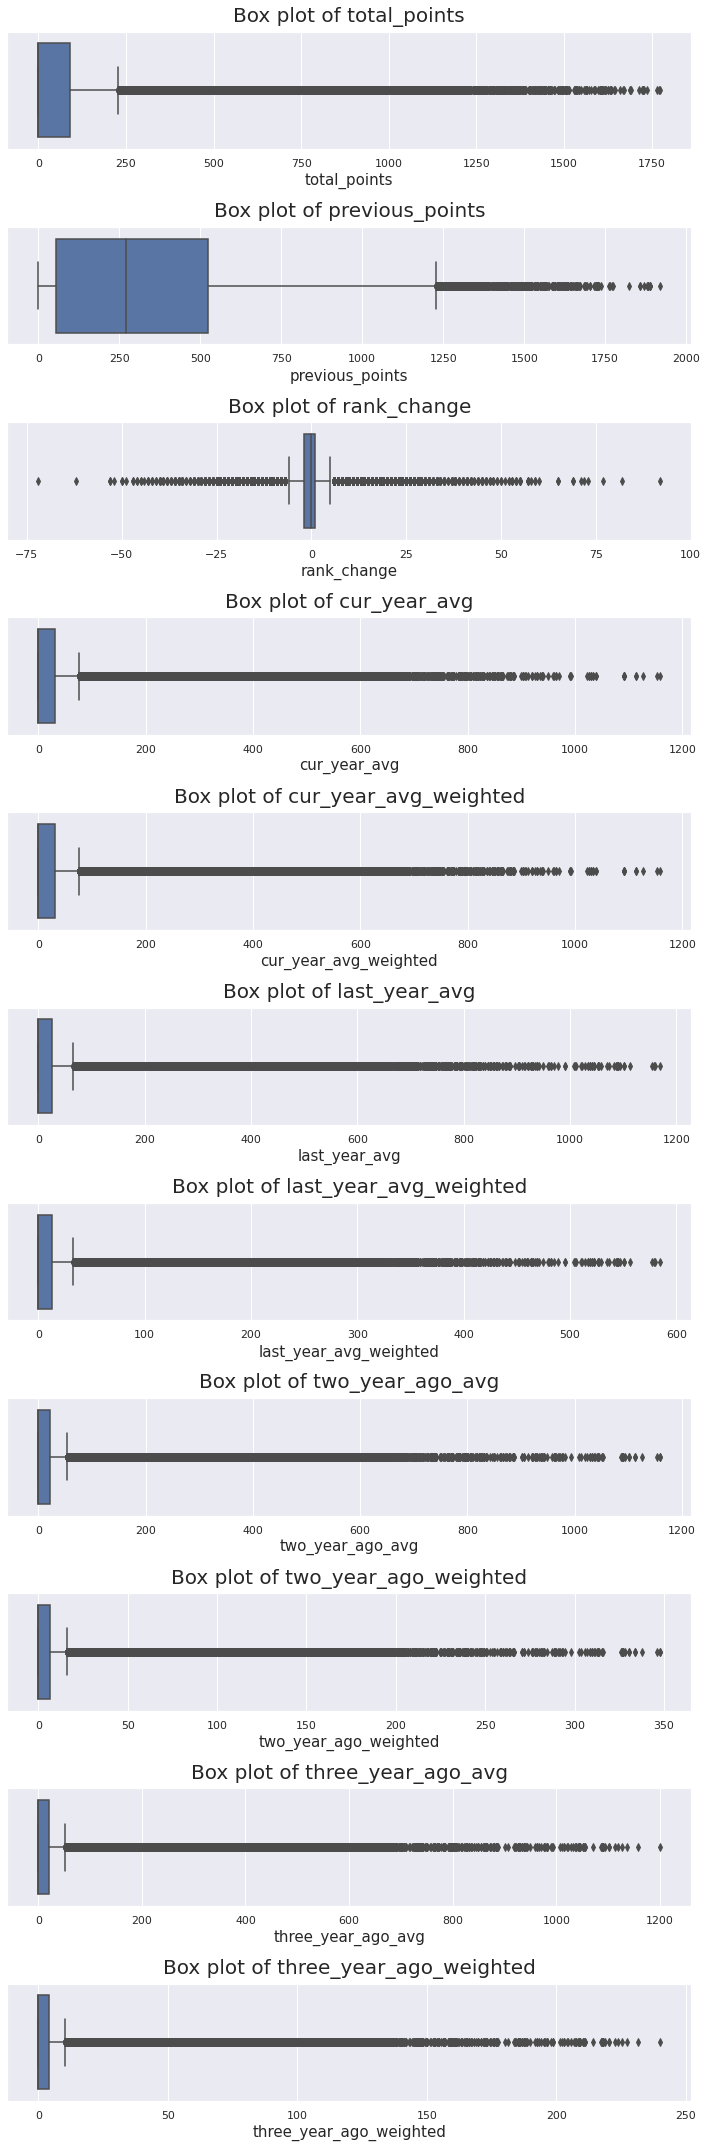

In [284]:
# Checking for Outliers
#
numeric = fifa.drop(['rank', 'country_full', 'country_abrv', 'confederation', 'rank_date'],axis=1)

columns = None
columns = list(numeric.columns)

fig, ax = plt.subplots(nrows=11, ncols=1, figsize=(10,30))  

i = 0
for column in columns:

  sns.boxplot(x=fifa[column], ax=ax[i])
  ax[i].set_title(f'Box plot of {column}', fontsize=20, pad=10 )
  ax[i].set_xlabel(column, fontsize=15)
  i+=1

plt.tight_layout()
plt.show()

In [285]:
numeric = fifa.drop(['rank', 'country_full', 'country_abrv', 'confederation', 'rank_date'],axis=1)

columns = None
columns = list(numeric.columns)

for column in columns:

  max_threshold_fifa = fifa[column].quantile(0.95)
  min_threshold_fifa = fifa[column].quantile(0.05)
  df_1 = fifa[(fifa[column]<max_threshold_fifa) & (fifa[column]>min_threshold_fifa)]
  num = fifa.shape[0]-df_1.shape[0]
  print(f'{num} rows that are outliers in {column} \n This is {"{:.2f}".format((num/(fifa.shape[0]))*100)}% percent approximately of {column} column')
  print(' ')

43600 rows that are outliers in total_points 
 This is 75.49% percent approximately of total_points column
 
5989 rows that are outliers in previous_points 
 This is 10.37% percent approximately of previous_points column
 
6880 rows that are outliers in rank_change 
 This is 11.91% percent approximately of rank_change column
 
45405 rows that are outliers in cur_year_avg 
 This is 78.62% percent approximately of cur_year_avg column
 
45405 rows that are outliers in cur_year_avg_weighted 
 This is 78.62% percent approximately of cur_year_avg_weighted column
 
45522 rows that are outliers in last_year_avg 
 This is 78.82% percent approximately of last_year_avg column
 
45522 rows that are outliers in last_year_avg_weighted 
 This is 78.82% percent approximately of last_year_avg_weighted column
 
45771 rows that are outliers in two_year_ago_avg 
 This is 79.25% percent approximately of two_year_ago_avg column
 
45771 rows that are outliers in two_year_ago_weighted 
 This is 79.25% percent

#### Changing data type 


In [286]:
fifa['rank_date'] = pd.to_datetime(fifa['rank_date'], format="%Y/%m/%d")

#### Adding the column year

In [287]:
fifa['year'] = pd.DatetimeIndex(fifa['rank_date']).year
print(fifa['year'].unique())

[1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]


#### Adding the column month_year

In [288]:
fifa['month_year'] = fifa['rank_date'].dt.to_period('M')
print(fifa['month_year'].unique())

<PeriodArray>
['1993-08', '1993-09', '1993-10', '1993-11', '1993-12', '1994-02', '1994-03',
 '1994-04', '1994-05', '1994-06',
 ...
 '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03',
 '2018-04', '2018-05', '2018-06']
Length: 285, dtype: period[M]


#### Adding the column day

In [289]:
fifa['day'] = fifa['rank_date'].dt.day
print(fifa['day'].unique())

[ 8 23 22 19 15 17 14 21 13 25 20 16 24  3 28 18 27  9 12 10  7  5  6 11
 26 30  4  1  2 31 29]


#### Adding the column month

In [290]:
fifa['month_number'] = pd.DatetimeIndex(fifa['rank_date']).month
fifa['month_name'] = pd.DatetimeIndex(fifa['rank_date']).month
a = list(fifa['month_number'].unique())
b = sorted(a)
print(b)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [291]:
fifa['month_name'].replace({1:'January',
                       2:'February', 
                       3:'March',
                       4:'April', 
                       5:'May',
                       6:'June', 
                       7:'July',
                       8:'August', 
                       9:'September', 
                       10:'October', 
                       11:'November', 
                       12:'December'}, inplace=True)
print(fifa['month_name'].unique())

['August' 'September' 'October' 'November' 'December' 'February' 'March'
 'April' 'May' 'June' 'July' 'January']


#### Changing the title

In [292]:
fifa = fifa.rename(columns={'rank_date': 'date'})

In [293]:
fifa.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'date', 'year',
       'month_year', 'day', 'month_number', 'month_name'],
      dtype='object')

In [294]:
# fifa[(fifa['country_full']=='Norway') & (fifa['year']==1993) & (fifa['confederation']=='UEFA')].sort_values(by="date", ascending=False)
fifa[(fifa['country_full']=='Norway') & (fifa['year']<=1994) & (fifa['confederation']=='UEFA')].sort_values(by="date", ascending=False)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date,year,month_year,day,month_number,month_name
2392,8,Norway,NOR,0.0,57,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1994-12-20,1994,1994-12,20,12,December
2216,10,Norway,NOR,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1994-11-22,1994,1994-11,22,11,November
2041,10,Norway,NOR,0.0,57,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1994-10-25,1994,1994-10,25,10,October
1866,8,Norway,NOR,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1994-09-13,1994,1994-09,13,9,September
1693,8,Norway,NOR,0.0,55,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1994-07-21,1994,1994-07,21,7,July
1518,6,Norway,NOR,0.0,56,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1994-06-14,1994,1994-06,14,6,June
1345,4,Norway,NOR,0.0,57,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1994-05-17,1994,1994-05,17,5,May
1175,3,Norway,NOR,0.0,58,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1994-04-19,1994,1994-04,19,4,April
1006,3,Norway,NOR,0.0,56,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1994-03-15,1994,1994-03,15,3,March
841,5,Norway,NOR,0.0,57,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1994-02-15,1994,1994-02,15,2,February


In [295]:
# for i, row in fifa.iterrows():
#   year =  fifa.loc[i,'year']
#   country = fifa.loc[i,'country_full']
#   confederation = fifa.loc[i,'confederation']
  # the_record = fifa[(fifa['country_full']==country) & (fifa['year']==year) & (fifa['confederation']==confederation)].sort_values(by="date", ascending=False).head(1)
  # a = the_record['rank']
  # the_rank = a.iloc[0]
  # if the_rank == fifa.loc[i,'rank']:
  #   continue
  # fifa.loc[i,'rank'] = the_rank

In [296]:
# fifa[(fifa['country_full']=='Norway') & (fifa['year']==year) & (fifa['confederation']=='UEFA')].sort_values(by="date", ascending=False)

### Second Dataset

#### Missing Data

In [297]:
# Identifying the Missing Data
#
results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

#### Duplicate data

In [298]:
results.duplicated().any()

False

#### Drop columns

In [299]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


#### Outliers

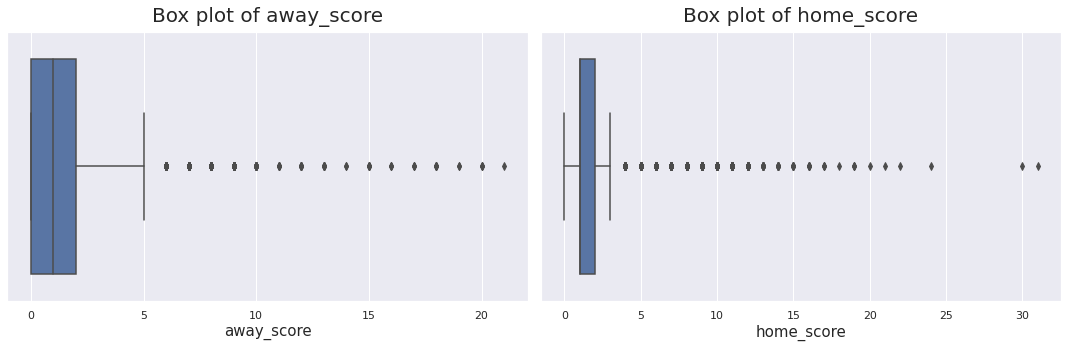

In [300]:
# Checking for Outliers
#
numeric = results[['away_score', 'home_score']]

columns = None
columns = list(numeric.columns)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))  

i = 0
for column in columns:

  sns.boxplot(x=results[column], ax=ax[i])
  ax[i].set_title(f'Box plot of {column}', fontsize=20, pad=10 )
  ax[i].set_xlabel(column, fontsize=15)
  i+=1

plt.tight_layout()
plt.show()

In [301]:
numeric = results[['away_score', 'home_score']]

columns = None
columns = list(numeric.columns)

for column in columns:

  max_threshold_r = results[column].quantile(0.95)
  min_threshold_r = results[column].quantile(0.05)
  df_1 = results[(results[column]<max_threshold_r) & (results[column]>min_threshold_r)]
  num = results.shape[0]-df_1.shape[0]
  print(f'{num} rows that are outliers in {column} \n This is {"{:.2f}".format((num/(results.shape[0]))*100)}% percent approximately of {column} column')
  print(' ')

17498 rows that are outliers in away_score 
 This is 42.85% percent approximately of away_score column
 
12447 rows that are outliers in home_score 
 This is 30.48% percent approximately of home_score column
 


#### Changing data type 


In [302]:
results['date'] = pd.to_datetime(results['date'], format="%Y/%m/%d")

#### Adding the column month_year

In [303]:
results['month_year'] = results['date'].dt.to_period('M')
print(results['month_year'].unique())

<PeriodArray>
['1872-11', '1873-03', '1874-03', '1875-03', '1876-03', '1877-03', '1878-03',
 '1879-01', '1879-04', '1880-03',
 ...
 '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04',
 '2019-05', '2019-06', '2019-07']
Length: 1393, dtype: period[M]


#### Adding the column day

In [304]:
results['day'] = results['date'].dt.day
print(results['day'].unique())

[30  8  7  6  4 25  3  5  2 23 18 13 15 27 26 12 14 11 24 10 17  9 29 28
 21 20 19 22  1 31 16]


#### Adding the column month

In [305]:
results['month_number'] = pd.DatetimeIndex(results['date']).month
results['month_name'] = pd.DatetimeIndex(results['date']).month
a = list(results['month_number'].unique())
b = sorted(a)
print(b)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [306]:
results['month_name'].replace({1:'January',
                       2:'February', 
                       3:'March',
                       4:'April', 
                       5:'May',
                       6:'June', 
                       7:'July',
                       8:'August', 
                       9:'September', 
                       10:'October', 
                       11:'November', 
                       12:'December'}, inplace=True)
print(results['month_name'].unique())

['November' 'March' 'January' 'April' 'February' 'September' 'May' 'July'
 'October' 'June' 'August' 'December']


In [307]:
for i,row in results.iterrows():
  a = results.loc[i, 'tournament']
  b = a.lower()
  if ('world cup' in b)==True:
    results.loc[i, 'tournament'] = 'World cup'
  elif (('friendly' in b)==True):
    pass
  else:
    results.loc[i, 'tournament'] = 'Other'
results['tournament'].unique()

array(['Friendly', 'Other', 'World cup'], dtype=object)

In [308]:
for i,row in results.iterrows():
  home = results.loc[i, 'home_score']
  away = results.loc[i, 'away_score']
  if (home > away):
    results.loc[i, 'status'] = 'Win'
  elif (home < away):
    results.loc[i, 'status'] = 'Lose'
  else:
    results.loc[i, 'status'] = 'Draw'
results['status'].unique()

array(['Draw', 'Win', 'Lose'], dtype=object)

## \ **Exploratory Analysis**\

### Univariate(for fifa dataset)

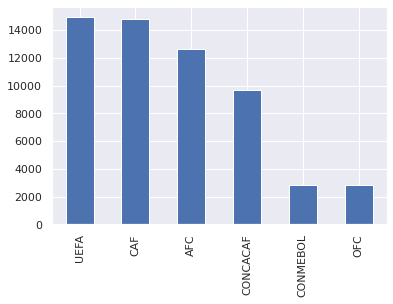

In [309]:
fifa['confederation'].value_counts().plot(kind='bar')

> Most of the matches play come from UEFA and CAF.

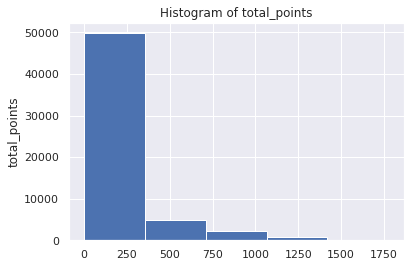

In [310]:
rank = fifa['total_points']
plt.hist(rank, bins=5, histtype='bar')

plt.ylabel('total_points')
plt.title('Histogram of total_points')
plt.show()

#### Central Tendency

In [311]:
fifa.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'date', 'year',
       'month_year', 'day', 'month_number', 'month_name'],
      dtype='object')

In [312]:
numeric = fifa.drop(['country_full', 'country_abrv', 'confederation', 'date', 'month_name', 'month_year'],axis=1)
col = list(numeric.columns)

In [313]:
col

['rank',
 'total_points',
 'previous_points',
 'rank_change',
 'cur_year_avg',
 'cur_year_avg_weighted',
 'last_year_avg',
 'last_year_avg_weighted',
 'two_year_ago_avg',
 'two_year_ago_weighted',
 'three_year_ago_avg',
 'three_year_ago_weighted',
 'year',
 'day',
 'month_number']

##### mean

In [314]:
for i in col:
  mean = fifa[i].mean()
  print(f'This is the mean of the {i} column: ')
  print(f'{mean}')
  print('  ')

This is the mean of the rank column: 
101.61811759817162
  
This is the mean of the total_points column: 
121.97115104924205
  
This is the mean of the previous_points column: 
332.33996467899436
  
This is the mean of the rank_change column: 
-0.0099383613823672
  
This is the mean of the cur_year_avg column: 
61.7513624558485
  
This is the mean of the cur_year_avg_weighted column: 
61.7513624558485
  
This is the mean of the last_year_avg column: 
60.953507341228374
  
This is the mean of the last_year_avg_weighted column: 
30.476829766604226
  
This is the mean of the two_year_ago_avg column: 
59.734768335757124
  
This is the mean of the two_year_ago_weighted column: 
17.92046938846179
  
This is the mean of the three_year_ago_avg column: 
59.114466375787316
  
This is the mean of the three_year_ago_weighted column: 
11.822921601219143
  
This is the mean of the year column: 
2006.1730209848326
  
This is the mean of the day column: 
15.018301128887042
  
This is the mean of the m

##### median

In [315]:
for i in col:
  median = fifa[i].median()
  print(f'This is the median of the {i} column: ')
  print(f'{median}')
  print('  ')

This is the median of the rank column: 
101.0
  
This is the median of the total_points column: 
0.0
  
This is the median of the previous_points column: 
272.0
  
This is the median of the rank_change column: 
0.0
  
This is the median of the cur_year_avg column: 
0.0
  
This is the median of the cur_year_avg_weighted column: 
0.0
  
This is the median of the last_year_avg column: 
0.0
  
This is the median of the last_year_avg_weighted column: 
0.0
  
This is the median of the two_year_ago_avg column: 
0.0
  
This is the median of the two_year_ago_weighted column: 
0.0
  
This is the median of the three_year_ago_avg column: 
0.0
  
This is the median of the three_year_ago_weighted column: 
0.0
  
This is the median of the year column: 
2006.0
  
This is the median of the day column: 
16.0
  
This is the median of the month_number column: 
7.0
  


##### mode

In [316]:
mod = fifa.drop(['country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'date', 'year', 'day',
       'month_number','month_year'],axis=1)
col = list(mod.columns)
for i in col:
  mode = fifa[i].mode()[0]
  print(f'This is the mode of the {i} column: ')
  print(f'{mode}')
  print('  ')

This is the mode of the rank column: 
147
  
This is the mode of the country_full column: 
Sudan
  
This is the mode of the confederation column: 
UEFA
  
This is the mode of the month_name column: 
May
  


#### Dispersion

##### Standard Deviation

In [317]:
numeric = fifa.drop(['country_full', 'country_abrv', 'confederation', 'date', 'month_name', 'month_year'],axis=1)
col = list(numeric.columns)

for i in col:
  mode = fifa[i].std()
  print(f'This is the Standard Deviation of the {i} column: ')
  print(f'{mode}')
  print('  ')

This is the Standard Deviation of the rank column: 
58.6350962126357
  
This is the Standard Deviation of the total_points column: 
260.4791908256627
  
This is the Standard Deviation of the previous_points column: 
302.96417559526026
  
This is the Standard Deviation of the rank_change column: 
5.802787706913632
  
This is the Standard Deviation of the cur_year_avg column: 
138.04200646327516
  
This is the Standard Deviation of the cur_year_avg_weighted column: 
138.04200646327516
  
This is the Standard Deviation of the last_year_avg column: 
137.71294461767638
  
This is the Standard Deviation of the last_year_avg_weighted column: 
68.8565136251929
  
This is the Standard Deviation of the two_year_ago_avg column: 
136.3191193341892
  
This is the Standard Deviation of the two_year_ago_weighted column: 
40.895761005541885
  
This is the Standard Deviation of the three_year_ago_avg column: 
135.54013469372137
  
This is the Standard Deviation of the three_year_ago_weighted column: 
2

##### Variance

In [318]:
for i in col:
  variance = fifa[i].var()
  print(f'This is the variance of the {i} column: ')
  print(f'{variance}')
  print('  ')

This is the variance of the rank column: 
3438.0745078650457
  
This is the variance of the total_points column: 
67849.40885319203
  
This is the variance of the previous_points column: 
91787.2916941157
  
This is the variance of the rank_change column: 
33.67234517150797
  
This is the variance of the cur_year_avg column: 
19055.5955484069
  
This is the variance of the cur_year_avg_weighted column: 
19055.5955484069
  
This is the variance of the last_year_avg column: 
18964.855115271206
  
This is the variance of the last_year_avg_weighted column: 
4741.219468616377
  
This is the variance of the two_year_ago_avg column: 
18582.902296048913
  
This is the variance of the two_year_ago_weighted column: 
1672.4632682224005
  
This is the variance of the three_year_ago_avg column: 
18371.12811279213
  
This is the variance of the three_year_ago_weighted column: 
734.8454985820633
  
This is the variance of the year column: 
49.45857503764371
  
This is the variance of the day column: 

##### Maximum

In [319]:
for i in col:
  max = fifa[i].max()
  print(f'This is the largest value in the {i} column: ')
  print(f'{max}')
  print('  ')

This is the largest value in the rank column: 
209
  
This is the largest value in the total_points column: 
1775.03
  
This is the largest value in the previous_points column: 
1920
  
This is the largest value in the rank_change column: 
92
  
This is the largest value in the cur_year_avg column: 
1158.66
  
This is the largest value in the cur_year_avg_weighted column: 
1158.66
  
This is the largest value in the last_year_avg column: 
1169.57
  
This is the largest value in the last_year_avg_weighted column: 
584.79
  
This is the largest value in the two_year_ago_avg column: 
1159.71
  
This is the largest value in the two_year_ago_weighted column: 
347.91
  
This is the largest value in the three_year_ago_avg column: 
1200.77
  
This is the largest value in the three_year_ago_weighted column: 
240.15
  
This is the largest value in the year column: 
2018
  
This is the largest value in the day column: 
31
  
This is the largest value in the month_number column: 
12
  


##### Minimum

In [320]:
for i in col:
  min = fifa[i].min()
  print(f'This is the small value in the {i} column: ')
  print(f'{min}')
  print('  ')

This is the small value in the rank column: 
1
  
This is the small value in the total_points column: 
0.0
  
This is the small value in the previous_points column: 
0
  
This is the small value in the rank_change column: 
-72
  
This is the small value in the cur_year_avg column: 
0.0
  
This is the small value in the cur_year_avg_weighted column: 
0.0
  
This is the small value in the last_year_avg column: 
0.0
  
This is the small value in the last_year_avg_weighted column: 
0.0
  
This is the small value in the two_year_ago_avg column: 
0.0
  
This is the small value in the two_year_ago_weighted column: 
0.0
  
This is the small value in the three_year_ago_avg column: 
0.0
  
This is the small value in the three_year_ago_weighted column: 
0.0
  
This is the small value in the year column: 
1993
  
This is the small value in the day column: 
1
  
This is the small value in the month_number column: 
1
  


##### Range

In [321]:
for i in col:
  max = fifa[i].max()
  min = fifa[i].min()
  range = max - min
  print(f'This is the range of the {i} column: ')
  print(f'{range}')
  print('  ')

This is the range of the rank column: 
208
  
This is the range of the total_points column: 
1775.03
  
This is the range of the previous_points column: 
1920
  
This is the range of the rank_change column: 
164
  
This is the range of the cur_year_avg column: 
1158.66
  
This is the range of the cur_year_avg_weighted column: 
1158.66
  
This is the range of the last_year_avg column: 
1169.57
  
This is the range of the last_year_avg_weighted column: 
584.79
  
This is the range of the two_year_ago_avg column: 
1159.71
  
This is the range of the two_year_ago_weighted column: 
347.91
  
This is the range of the three_year_ago_avg column: 
1200.77
  
This is the range of the three_year_ago_weighted column: 
240.15
  
This is the range of the year column: 
25
  
This is the range of the day column: 
30
  
This is the range of the month_number column: 
11
  


##### Quantiles

###### First Quantile

In [322]:
for i in col:
  first_quantile = fifa[i].quantile(0.25)
  print(f'This is the first quantile of the {i} column: ')
  print(f'{first_quantile}')
  print('  ')

This is the first quantile of the rank column: 
51.0
  
This is the first quantile of the total_points column: 
0.0
  
This is the first quantile of the previous_points column: 
56.0
  
This is the first quantile of the rank_change column: 
-2.0
  
This is the first quantile of the cur_year_avg column: 
0.0
  
This is the first quantile of the cur_year_avg_weighted column: 
0.0
  
This is the first quantile of the last_year_avg column: 
0.0
  
This is the first quantile of the last_year_avg_weighted column: 
0.0
  
This is the first quantile of the two_year_ago_avg column: 
0.0
  
This is the first quantile of the two_year_ago_weighted column: 
0.0
  
This is the first quantile of the three_year_ago_avg column: 
0.0
  
This is the first quantile of the three_year_ago_weighted column: 
0.0
  
This is the first quantile of the year column: 
2000.0
  
This is the first quantile of the day column: 
10.0
  
This is the first quantile of the month_number column: 
4.0
  


###### Second Quantile

In [323]:
for i in col:
  second_quantile = fifa[i].quantile(0.5)
  print(f'This is the second quantile of the {i} column: ')
  print(f'{second_quantile}')
  print('  ')

This is the second quantile of the rank column: 
101.0
  
This is the second quantile of the total_points column: 
0.0
  
This is the second quantile of the previous_points column: 
272.0
  
This is the second quantile of the rank_change column: 
0.0
  
This is the second quantile of the cur_year_avg column: 
0.0
  
This is the second quantile of the cur_year_avg_weighted column: 
0.0
  
This is the second quantile of the last_year_avg column: 
0.0
  
This is the second quantile of the last_year_avg_weighted column: 
0.0
  
This is the second quantile of the two_year_ago_avg column: 
0.0
  
This is the second quantile of the two_year_ago_weighted column: 
0.0
  
This is the second quantile of the three_year_ago_avg column: 
0.0
  
This is the second quantile of the three_year_ago_weighted column: 
0.0
  
This is the second quantile of the year column: 
2006.0
  
This is the second quantile of the day column: 
16.0
  
This is the second quantile of the month_number column: 
7.0
  


###### Third Quantile

In [324]:
for i in col:
  third_quantile = fifa[i].quantile(0.75)
  print(f'This is the third quantile of the {i} column: ')
  print(f'{third_quantile}')
  print('  ')

This is the third quantile of the rank column: 
152.0
  
This is the third quantile of the total_points column: 
91.5
  
This is the third quantile of the previous_points column: 
525.0
  
This is the third quantile of the rank_change column: 
1.0
  
This is the third quantile of the cur_year_avg column: 
30.4475
  
This is the third quantile of the cur_year_avg_weighted column: 
30.4475
  
This is the third quantile of the last_year_avg column: 
26.4
  
This is the third quantile of the last_year_avg_weighted column: 
13.2
  
This is the third quantile of the two_year_ago_avg column: 
21.25
  
This is the third quantile of the two_year_ago_weighted column: 
6.38
  
This is the third quantile of the three_year_ago_avg column: 
20.795
  
This is the third quantile of the three_year_ago_weighted column: 
4.1625
  
This is the third quantile of the year column: 
2012.0
  
This is the third quantile of the day column: 
20.0
  
This is the third quantile of the month_number column: 
10.0
  

#### Descriptions of the distribution curve

##### Skewness

In [325]:
for i in col:
  skewness = fifa[i].skew()
  print(f'This is the skewness of the {i} column: ')
  print(f'{skewness}')
  print('  ')

This is the skewness of the rank column: 
0.018697560304961978
  
This is the skewness of the total_points column: 
2.588628658130345
  
This is the skewness of the previous_points column: 
1.0976209078436039
  
This is the skewness of the rank_change column: 
1.2387472729578097
  
This is the skewness of the cur_year_avg column: 
2.7847173066306636
  
This is the skewness of the cur_year_avg_weighted column: 
2.7847173066306636
  
This is the skewness of the last_year_avg column: 
2.8826204517315164
  
This is the skewness of the last_year_avg_weighted column: 
2.882613017243387
  
This is the skewness of the two_year_ago_avg column: 
2.881021528682775
  
This is the skewness of the two_year_ago_weighted column: 
2.8810175657716393
  
This is the skewness of the three_year_ago_avg column: 
2.9119344417489983
  
This is the skewness of the three_year_ago_weighted column: 
2.91192631008562
  
This is the skewness of the year column: 
-0.08381950107331076
  
This is the skewness of the d

##### Kurtosis

In [326]:
for i in col:
  kurtosis = fifa[i].kurt()
  print(f'This is the kurtosis of the {i} column: ')
  print(f'{kurtosis}')
  print('  ')

This is the kurtosis of the rank column: 
-1.1804205541924453
  
This is the kurtosis of the total_points column: 
6.895419571032518
  
This is the kurtosis of the previous_points column: 
1.3069816192284835
  
This is the kurtosis of the rank_change column: 
19.676552194198347
  
This is the kurtosis of the cur_year_avg column: 
8.449820474100262
  
This is the kurtosis of the cur_year_avg_weighted column: 
8.449820474100262
  
This is the kurtosis of the last_year_avg column: 
9.400430087283988
  
This is the kurtosis of the last_year_avg_weighted column: 
9.400377506038938
  
This is the kurtosis of the two_year_ago_avg column: 
9.34901226554119
  
This is the kurtosis of the two_year_ago_weighted column: 
9.348981641604768
  
This is the kurtosis of the three_year_ago_avg column: 
9.706373625696592
  
This is the kurtosis of the three_year_ago_weighted column: 
9.70630153793773
  
This is the kurtosis of the year column: 
-1.1329921911609366
  
This is the kurtosis of the day colum

### Univariate(for the result dataset)

In [327]:
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'month_year', 'day',
       'month_number', 'month_name', 'status'],
      dtype='object')

> Scotland played the most matches.

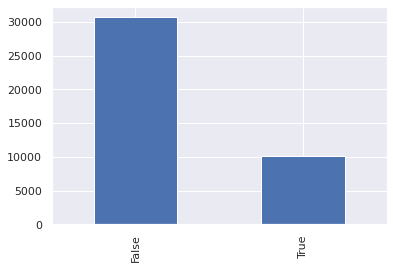

In [328]:
results['neutral'].value_counts().plot(kind='bar')

> match really played in neutral grounds

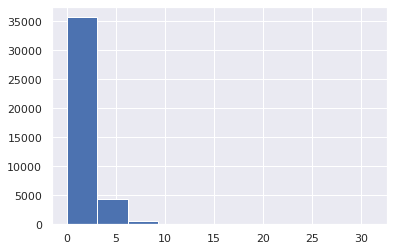

In [329]:
results['home_score'].hist()

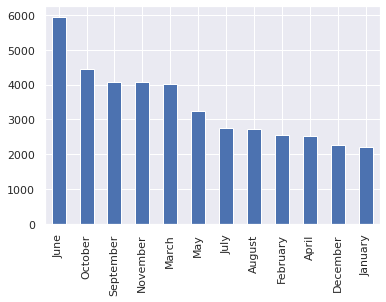

In [330]:
results['month_name'].value_counts().plot(kind='bar')

> In our dataset common for most matches are held in March

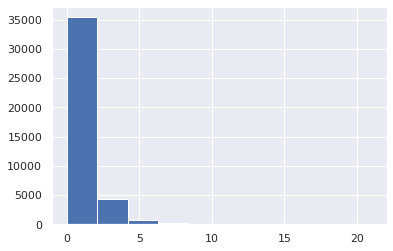

In [331]:
results['away_score'].hist()

#### Central Tendency

In [332]:
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'month_year', 'day',
       'month_number', 'month_name', 'status'],
      dtype='object')

In [333]:
numeric = results.drop(['date', 'home_team', 'away_team',
       'tournament', 'city', 'country', 'neutral', 'day',
       'month_number', 'month_name', 'status','month_year'],axis=1)
col = list(numeric.columns)

##### mean

In [334]:
for i in col:
  mean = results[i].mean()
  print(f'This is the mean of the {i} column: ')
  print(f'{mean}')
  print('  ')

This is the mean of the home_score column: 
1.7457087587844953
  
This is the mean of the away_score column: 
1.188104507945836
  


##### median

In [335]:
for i in col:
  median = results[i].median()
  print(f'This is the median of the {i} column: ')
  print(f'{median}')
  print('  ')

This is the median of the home_score column: 
1.0
  
This is the median of the away_score column: 
1.0
  


##### mode

In [336]:
mod = results.drop(['date', 'day',
       'month_number','month_year'],axis=1)
col = list(mod.columns)
for i in col:
  mode = results[i].mode()[0]
  print(f'This is the mode of the {i} column: ')
  print(f'{mode}')
  print('  ')

This is the mode of the home_team column: 
Brazil
  
This is the mode of the away_team column: 
Uruguay
  
This is the mode of the home_score column: 
1
  
This is the mode of the away_score column: 
0
  
This is the mode of the tournament column: 
Friendly
  
This is the mode of the city column: 
Kuala Lumpur
  
This is the mode of the country column: 
United States
  
This is the mode of the neutral column: 
False
  
This is the mode of the month_name column: 
June
  
This is the mode of the status column: 
Win
  


#### Dispersion

##### Standard Deviation

In [337]:
numeric = results.drop(['date', 'home_team', 'away_team',
       'tournament', 'city', 'country', 'neutral', 'day',
       'month_number', 'month_name', 'status', 'month_year'],axis=1)
col = list(numeric.columns)

for i in col:
  mode = results[i].std()
  print(f'This is the Standard Deviation of the {i} column: ')
  print(f'{mode}')
  print('  ')

This is the Standard Deviation of the home_score column: 
1.74914491825338
  
This is the Standard Deviation of the away_score column: 
1.4051198000976626
  


##### Variance

In [338]:
for i in col:
  variance = results[i].var()
  print(f'This is the variance of the {i} column: ')
  print(f'{variance}')
  print('  ')

This is the variance of the home_score column: 
3.0595079450516236
  
This is the variance of the away_score column: 
1.974361652626495
  


##### Maximum

In [339]:
for i in col:
  max = results[i].max()
  print(f'This is the largest value in the {i} column: ')
  print(f'{max}')
  print('  ')

This is the largest value in the home_score column: 
31
  
This is the largest value in the away_score column: 
21
  


##### Minimum

In [340]:
for i in col:
  min = results[i].min()
  print(f'This is the small value in the {i} column: ')
  print(f'{min}')
  print('  ')

This is the small value in the home_score column: 
0
  
This is the small value in the away_score column: 
0
  


##### Range

In [341]:
for i in col:
  max = results[i].max()
  min = results[i].min()
  range = max - min
  print(f'This is the range of the {i} column: ')
  print(f'{range}')
  print('  ')

This is the range of the home_score column: 
31
  
This is the range of the away_score column: 
21
  


##### Quantiles

###### First Quantile

In [342]:
for i in col:
  first_quantile = results[i].quantile(0.25)
  print(f'This is the first quantile of the {i} column: ')
  print(f'{first_quantile}')
  print('  ')

This is the first quantile of the home_score column: 
1.0
  
This is the first quantile of the away_score column: 
0.0
  


###### Second Quantile

In [343]:
for i in col:
  second_quantile = results[i].quantile(0.5)
  print(f'This is the second quantile of the {i} column: ')
  print(f'{second_quantile}')
  print('  ')

This is the second quantile of the home_score column: 
1.0
  
This is the second quantile of the away_score column: 
1.0
  


###### Third Quantile

In [344]:
for i in col:
  third_quantile = results[i].quantile(0.75)
  print(f'This is the third quantile of the {i} column: ')
  print(f'{third_quantile}')
  print('  ')

This is the third quantile of the home_score column: 
2.0
  
This is the third quantile of the away_score column: 
2.0
  


#### Descriptions of the distribution curve

##### Skewness

In [345]:
for i in col:
  skewness = results[i].skew()
  print(f'This is the skewness of the {i} column: ')
  print(f'{skewness}')
  print('  ')

This is the skewness of the home_score column: 
2.2015038640372713
  
This is the skewness of the away_score column: 
2.59058860926579
  


##### Kurtosis

In [346]:
for i in col:
  kurtosis = results[i].kurt()
  print(f'This is the kurtosis of the {i} column: ')
  print(f'{kurtosis}')
  print('  ')

This is the kurtosis of the home_score column: 
11.71410446777048
  
This is the kurtosis of the away_score column: 
15.757919940541624
  


### Bivariate

**First dataset**

In [347]:
fifa.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'date', 'year',
       'month_year', 'day', 'month_number', 'month_name'],
      dtype='object')

In [348]:
c_fifa = fifa.drop(['cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'date', 'day', 'month_year'], axis=1)

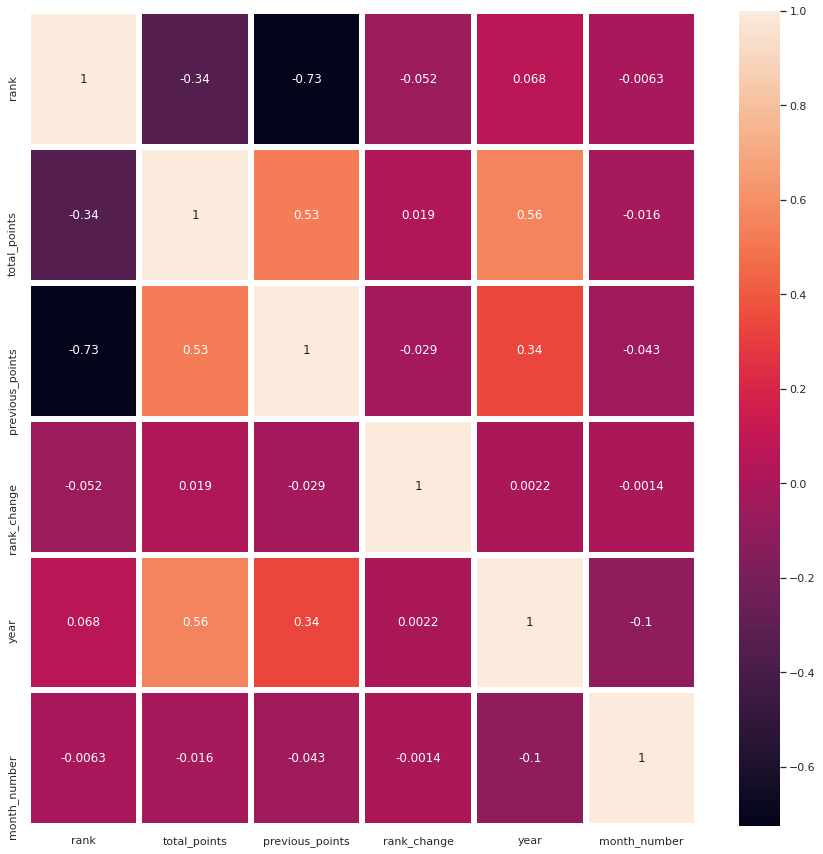

In [349]:
plt.subplots(figsize=(15,15))
sns.heatmap(c_fifa.corr(),annot=True, linewidths=5, linecolor='white')
sns.set(font_scale=1)
plt.show()

**Second dataset**

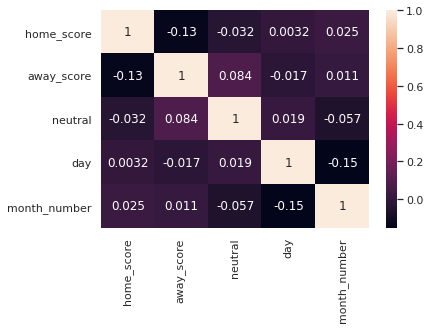

In [350]:
sns.heatmap(results.corr(),annot=True)
plt.show()

## \ **Implementing the Solution**\

In [351]:
fifa.shape

(57756, 21)

In [352]:
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'month_year', 'day',
       'month_number', 'month_name', 'status'],
      dtype='object')

In [353]:
fifa_home = fifa[['rank', 'country_full', 'month_year']]
fifa_home.rename(columns={'country_full':'home_team'}, inplace=True)
fifa_away = fifa[['rank', 'country_full', 'month_year']]
fifa_away.rename(columns={'country_full':'away_team'}, inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [354]:
results_1_home = results[['home_team','home_score', 'month_year','tournament','status']]

In [355]:
results_1_home = results_1_home.merge(fifa_home, on=['month_year','home_team'], how='inner')

In [356]:
results_1_home.rename(columns={'rank':'home_team_rank'}, inplace=True)

In [357]:
results_1_away = results[['away_team','away_score', 'month_year','tournament','status']]

In [358]:
results_1_away = results_1_away.merge(fifa_away, on=['month_year','away_team'])

In [359]:
results_1_away.rename(columns={'rank':'away_team_rank'}, inplace=True)

In [360]:
# results_1_home = pd.read_csv('results_home.csv', index_col=0)
results_1_home[['home_team', 'home_score', 'month_year', 'tournament', 'status',
       'home_team_rank']]

,home_team,home_score,month_year,tournament,status,home_team_rank
0,Colombia,0,1993-08,World cup,Draw,19
1,Colombia,2,1993-08,World cup,Win,19
2,Colombia,4,1993-08,World cup,Win,19
3,Peru,0,1993-08,World cup,Lose,70
4,Peru,0,1993-08,World cup,Lose,70
...,...,...,...,...,...,...
18588,Nigeria,2,2018-06,World cup,Win,48
18589,Nigeria,1,2018-06,World cup,Lose,48
18590,Australia,0,2018-06,World cup,Lose,36
18591,Senegal,0,2018-06,World cup,Lose,27


In [361]:
# results_1_away = pd.read_csv('results_away.csv', index_col=0)
results_1_away[['away_team', 'away_score', 'month_year', 'tournament', 'status',
       'away_team_rank']]

,away_team,away_score,month_year,tournament,status,away_team_rank
0,Paraguay,0,1993-08,World cup,Draw,67
1,Paraguay,0,1993-08,World cup,Draw,67
2,Argentina,1,1993-08,World cup,Lose,5
3,Argentina,3,1993-08,World cup,Lose,5
4,Argentina,1,1993-08,World cup,Win,5
...,...,...,...,...,...,...
18497,France,0,2018-06,World cup,Draw,7
18498,Argentina,2,2018-06,World cup,Lose,5
18499,Argentina,3,2018-06,World cup,Win,5
18500,Poland,1,2018-06,World cup,Lose,8


In [362]:
results_1 = results_1_home.merge(results_1_away, on=['month_year','tournament','status'])

### Approach 1: Polynomial approach

##### Detecting multicollinearity

In [363]:
results_1 = results_1.dropna()

In [364]:
label_encoder = LabelEncoder()

#transform to integer
results_1['tournament'] = label_encoder.fit_transform(results_1['tournament'])

In [365]:
independent_only = results_1[['home_team_rank','away_team_rank','tournament','away_score']]
independent_only.corr()

,home_team_rank,away_team_rank,tournament,away_score
home_team_rank,1.000000,0.090350,-0.000637,0.170128
away_team_rank,0.090350,1.000000,0.038567,-0.194209
tournament,-0.000637,0.038567,1.000000,0.008233
away_score,0.170128,-0.194209,0.008233,1.000000


In [366]:
# Let's display the correlations between the variables
correlations = independent_only.corr()
correlations

,home_team_rank,away_team_rank,tournament,away_score
home_team_rank,1.000000,0.090350,-0.000637,0.170128
away_team_rank,0.090350,1.000000,0.038567,-0.194209
tournament,-0.000637,0.038567,1.000000,0.008233
away_score,0.170128,-0.194209,0.008233,1.000000


In [367]:
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,home_team_rank,away_team_rank,tournament,away_score
home_team_rank,1.046920,-0.134557,0.007539,-0.204305
away_team_rank,-0.134557,1.058235,-0.042782,0.228763
tournament,0.007539,-0.042782,1.001802,-0.017839
away_score,-0.204305,0.228763,-0.017839,1.079333


#### Model 1: Predict how many goals the home team scores.

##### Residual plots and heteroskedasticity testing

In [368]:
X = independent_only.values
y = results_1['home_score'].values

In [369]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X_train)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

# This is our prediction for score based on our model
y_pred = pol_reg.predict(poly_reg.fit_transform(X_test))

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

0.007633591909560726

In [370]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

print(f'critical_value : {critical_value}')
print(f'degree_of_freedom : {degree_of_freedom}')
print(f'probability : {probability}')

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

critical_value : inf
degree_of_freedom : 97219
probability : 1.0
the variances are homogeneous!


##### Creating modal

In [371]:
X = independent_only
y = results_1['home_score']

In [244]:
from sklearn.model_selection import LeaveOneOut

X = independent_only.values
y = results_1['home_score'].values

folds = KFold(n_splits=5)

print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

RMSES = [] 
count = 0 
for train_index, test_index in folds.split(X):
  
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # Fit polynomial Regression to the dataset
  poly_reg = PolynomialFeatures(degree = 2) 
  X_poly = poly_reg.fit_transform(X_train)


  pol_reg = LinearRegression()
  pol_reg.fit(X_poly, y_train)

  # This is our prediction for admission based on our model
  y_pred = pol_reg.predict(poly_reg.fit_transform(X_test))
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  count+=1
print('trained ' + str(count) + ' models' )
np.mean(RMSES)

we are using 5 folds
trained 5 models


1.6284130583169372

**RMSES**

In [245]:
np.mean(RMSES)

1.6284130583169372

In [246]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.131410368794534
Mean Squared Error: 2.237506054109723
Root Mean Squared Error: 1.4958295538294872


#### Model 2: Predict how many goals the away team scores.

##### Residual plots and heteroskedasticity testing

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X_train)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

# This is our prediction for score based on our model
y_pred = pol_reg.predict(poly_reg.fit_transform(X_test))

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

0.007633591909560726

In [248]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

print(f'critical_value : {critical_value}')
print(f'degree_of_freedom : {degree_of_freedom}')
print(f'probability : {probability}')

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

critical_value : inf
degree_of_freedom : 97219
probability : 1.0
the variances are homogeneous!


##### Creating modal

In [249]:
from sklearn.model_selection import LeaveOneOut

X = independent_only.values
y = results_1['away_score'].values

folds = KFold(n_splits=5)

print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

RMSES = [] 
count = 0 
for train_index, test_index in folds.split(X):
  
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # Fit polynomial Regression to the dataset
  poly_reg = PolynomialFeatures(degree = 2) 
  X_poly = poly_reg.fit_transform(X_train)

  pol_reg = LinearRegression()
  pol_reg.fit(X_poly, y_train)

  # This is our prediction for admission based on our model
  y_pred = pol_reg.predict(poly_reg.fit_transform(X_test))
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  count+=1
print('trained ' + str(count) + ' models' )
np.mean(RMSES)

we are using 5 folds
trained 5 models


1.6888574416683717e-13

**RMSES**

In [250]:
np.mean(RMSES)

1.6888574416683717e-13

In [251]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.4502795614179403e-13
Mean Squared Error: 1.2833999438201543e-25
Root Mean Squared Error: 3.58245717883711e-13


### Approach 2: Logistic approach

In [252]:
results_1 = results_1.drop(['home_team','away_team','month_year'],axis=1)

label_encoder = LabelEncoder()

#transform to integer
results_1['status'] = label_encoder.fit_transform(results_1['status'])
results_1['tournament'] = label_encoder.fit_transform(results_1['tournament'])

In [253]:
X = results_1.drop('status',axis=1)
y = results_1['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=0)

In [254]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [255]:
y_pred = LogReg.predict(X_test)

In [256]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 4539,  3965,  6605],
       [ 1514, 18502,  1646],
       [ 1358,   915, 58176]])

## Follow up questions

### a). Did we have the right data?

> Yes, this dataset contain enough information to predict a home team score based on their rank. Through the rank system it more like for team with a higher rank can bet another team with a lower rank

### b). Do we need other data to answer our question?

> Not really but I preffer to have source of the data set to draw more insit from the dataset.

### c). Did we have the right question?